### Exercise sheet 4

Cüneyt Erem
3277992
s6cuerem@uni-bonn.de

Nkeh Victor Ndiwago
3504121
s0vinkeh@uni-bonn.de

Paula Romero Jiménez
3320220
s0parome@uni-bonn.de

-----------------------------------------

### Exercise 1 - ANOVA F-test and Hierarchical Clustering (10 points)

-----------------------------------------

_Load the golub.csv dataset. It contains gene expression data of 3051 genes from 38 tumor mRNA samples. The expression data is organized in a matrix where rows correspond to genes and columns to samples. The tumor classification for the samples is given in the file “golub.cl.csv”._

In [1]:
import pandas as pd
from scipy import stats
import statsmodels.stats.multitest as multi
import pingouin as pg
import numpy as np

In [2]:
data = pd.read_csv("golub.csv")
data.head()

,gene_name,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
0,AFFX-HUMISGF3A/M97935_MA_at,-1.45769,-1.39420,-1.42779,-1.40715,-1.42668,-1.21719,-1.37386,-1.36832,-1.47649,...,-1.08902,-1.29865,-1.26183,-1.44434,1.10147,-1.34158,-1.22961,-0.75919,0.84905,-0.66465
1,AFFX-HUMISGF3A/M97935_MB_at,-0.75161,-1.26278,-0.09052,-0.99596,-1.24245,-0.69242,-1.37386,-0.50803,-1.04533,...,-1.08902,-1.05094,-1.26183,-1.25918,0.97813,-0.79357,-1.22961,-0.71792,0.45127,-0.45804
2,AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,...,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
3,AFFX-HUMRGE/M10098_5_at,3.13533,0.21415,2.08754,2.23467,0.93811,2.24089,3.36576,1.97859,2.66468,...,0.29598,-1.29865,2.76869,2.08960,0.70003,0.13854,1.75908,0.06151,1.30297,0.58186
4,AFFX-HUMRGE/M10098_M_at,2.76569,-1.27045,1.60433,1.53182,1.63728,1.85697,3.01847,1.12853,2.17016,...,-1.08902,-1.29865,2.00518,1.17454,-1.47218,-1.34158,1.55086,-1.18107,1.01596,0.15788


**1. ANOVA F-test**

_a. Familiarize yourself with multiple test corrections and briefly explain its
purpose. (1 point)_

The main purpose of multiple test corrections is adjusting the p-values derived from multiple statistical tests, so that it can correct the appearence of false positives.

_b. Using the Shapiro-Wilk test and Levene test, while accounting for
multiple testing problem using Benjamini/Hochberg correction, remove the genes (FDR / adj. P-value ≤ 0.05) that violate the ANOVA F-test assumptions. (3 points)_

ANOVA F-test assumptions:
- Independence: assumes that the observations are random and that the samples taken from the populations are independent of each other.
- Homogeneity of variance: assumes that the variances of the distributions in the populations are equal. 
- Normality: F-statistic requires that the dependent variable is normally distributed in each group.

Shapiro-Wilk test is used to calculate whether a random sample of data comes from a normal distribution which is an assumption of ANOVA test.

We can use the Levene’s test to test for equal variances between groups (homogeneity).

In [3]:
# We create the dataframe of our dataset
df = pd.DataFrame(data)

In [4]:
# We perform the Levene test with pingouin as it's difficult to separate our data in different vectors
pg.homoscedasticity(df, method='levene')

,W,pval,equal_var
levene,0.676116,0.933238,True


The data meets the assumption of homogeneity as the pvalue is > 0.05. We can perform ANOVA.

In [5]:
# We iterate in the rows of the dataframe to get a list of data to perform Shapiro test
pvalue_list = []
for i in range(0,3050):
    test = stats.shapiro(df.iloc[i,1:39])
    pvalue = test.pvalue
    pvalue_list.append(pvalue)

# Now we perform the FDR adjustment
fdr = multi.fdrcorrection(pvalue_list, alpha=0.05, method='indep', is_sorted=False)
pvalues_corr = fdr[1]


# We want a list with the number of the genes that don't meet the assumptions for ANOVA f-test
remove_genes = []
for i in range(0,3050):
    dic = {i:pvalues_corr[i]}
    for k,v in dic.items():
        if (v<=0.05):
            remove_genes.append(k)

print(len(remove_genes))

1331


In [6]:
new_df=df.drop(df.index[remove_genes])
new_df.head()

,gene_name,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
2,AFFX-HUMISGF3A/M97935_3_at,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,...,-0.43377,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509
10,AFFX-HUMTFRR/M11507_5_at,-0.56223,0.05358,0.12612,-0.84016,-0.43710,-0.38536,-0.87284,0.07453,-0.36118,...,0.51484,-0.13601,-0.16682,-0.20888,0.25911,-0.21631,0.19129,-0.57687,0.44808,1.19275
13,AFFX-M27830_5_at,2.42764,1.34873,1.61846,1.80194,0.81975,2.18509,2.69012,2.05478,2.02261,...,-0.16682,-0.69018,2.01143,1.28429,0.38541,0.23659,1.54027,0.23886,1.05465,2.00691
14,AFFX-M27830_M_at,2.40116,1.83222,1.62478,1.59089,0.75700,2.32267,1.64407,2.10957,1.64361,...,1.03327,1.16119,2.25875,1.62017,0.91712,1.50523,2.21754,1.23143,1.87913,2.49036
15,AFFX-M27830_3_at,0.80633,0.26994,0.49549,0.15222,-0.03737,-0.27141,0.48896,0.78938,0.22388,...,-0.13951,-0.14412,0.04123,0.56077,0.96868,0.87498,1.05000,0.51991,0.63487,0.08813


In [7]:
print(len(new_df))

1720


Now we have a new dataframe with the genes that meet the assumptions for the ANOVA F-test. We are going to work with 1720 genes instead of 3051.

_c. For each gene in the dataset, perform the ANOVA F-test (only for the subset of genes that met the assumptions) to see whether the gene is significantly differentially expressed between the two types of Leukemia. (1 point)_

_d. Use Bonferroni correction to select the genes that are significant. (1 point)_

_Hint: Due to our analysis, we now know which genes are significantly differentially expressed between groups. These will be the best features to use in order to get good cluster separation._

I want to perform an ANOVA F-test row by row to see which genes are significanty differentially expressed between the two types of Leukemia, that way I'll have a p-value for each row.

In [8]:
df2 = new_df.drop(columns='gene_name')

In [9]:
numpy_values = df2.values
no_significant_genes = []
for i in range(0,1719):
    F, p = stats.f_oneway(numpy_values[i],numpy_values[i+1]) # performing ANOVA F-test
    R, p_corr, a1, a2 = multi.multipletests(p, method='bonferroni') # performing Bonferroni correction
    if (p_corr <= 0.05):
        no_significant_genes.append(i)

print(len(no_significant_genes))

1351


I will eliminate these genes that aren't significantly important, so we can continue with the best genes for cluster separation.

In [10]:
df2.index

Int64Index([   2,   10,   13,   14,   15,   16,   18,   19,   20,   22,
            ...
            3040, 3041, 3042, 3043, 3044, 3045, 3046, 3048, 3049, 3050],
           dtype='int64', length=1720)

In [11]:
df2['Numbers']=np.arange(len(df2))
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V30,V31,V32,V33,V34,V35,V36,V37,V38,Numbers
2,0.45695,-0.09654,0.90325,-0.07194,0.03232,0.09713,-0.11978,0.23381,0.23987,0.44201,...,-0.10823,-0.29385,0.05067,1.69430,-0.12472,0.04609,0.24347,0.90774,0.46509,0
10,-0.56223,0.05358,0.12612,-0.84016,-0.43710,-0.38536,-0.87284,0.07453,-0.36118,-1.21583,...,-0.13601,-0.16682,-0.20888,0.25911,-0.21631,0.19129,-0.57687,0.44808,1.19275,1
13,2.42764,1.34873,1.61846,1.80194,0.81975,2.18509,2.69012,2.05478,2.02261,-1.21583,...,-0.69018,2.01143,1.28429,0.38541,0.23659,1.54027,0.23886,1.05465,2.00691,2
14,2.40116,1.83222,1.62478,1.59089,0.75700,2.32267,1.64407,2.10957,1.64361,0.32217,...,1.16119,2.25875,1.62017,0.91712,1.50523,2.21754,1.23143,1.87913,2.49036,3
15,0.80633,0.26994,0.49549,0.15222,-0.03737,-0.27141,0.48896,0.78938,0.22388,0.66716,...,-0.14412,0.04123,0.56077,0.96868,0.87498,1.05000,0.51991,0.63487,0.08813,4


In [12]:
df2.set_index('Numbers')
sign_df=df2.drop(df2.index[no_significant_genes])
sign_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V30,V31,V32,V33,V34,V35,V36,V37,V38,Numbers
18,0.10806,0.08245,0.48019,-0.29554,-1.25777,0.40172,0.06140,-0.33715,0.22733,-0.57804,...,-0.48494,-0.25817,-0.44108,-0.20584,0.29198,-0.01033,-0.08370,-0.11911,0.48378,6
20,-1.07755,-0.53800,-1.46227,0.07237,-1.27334,-0.29517,0.04723,0.60545,-1.47649,-0.60606,...,-0.19238,0.15285,-0.23164,-0.65171,-0.26579,0.27934,-1.39906,-0.56208,-0.17069,8
24,-0.23113,-0.58643,-0.33121,-0.48925,0.15938,-1.12872,-0.31126,-0.57804,0.38892,-0.45344,...,-1.29865,-1.16845,-1.26649,-0.33493,-1.34158,-1.22961,0.04997,-0.49252,0.20772,11
80,0.19505,0.62399,0.87229,0.41589,1.27093,0.61533,0.33006,-0.13260,1.06602,1.04420,...,0.40214,-0.19897,-0.63921,-1.22731,0.67926,-0.52782,-0.43522,-0.16785,-0.67788,39
82,0.29270,0.60010,0.66099,0.26766,0.48344,-0.21296,0.28216,0.15679,0.69034,0.28331,...,0.37434,0.37793,-0.09311,0.28613,-0.11031,-0.10927,-0.04210,0.64339,-0.53059,40


In [13]:
del sign_df['Numbers']
sign_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,V38
18,0.10806,0.08245,0.48019,-0.29554,-1.25777,0.40172,0.06140,-0.33715,0.22733,-0.57804,...,-1.08902,-0.48494,-0.25817,-0.44108,-0.20584,0.29198,-0.01033,-0.08370,-0.11911,0.48378
20,-1.07755,-0.53800,-1.46227,0.07237,-1.27334,-0.29517,0.04723,0.60545,-1.47649,-0.60606,...,-0.01087,-0.19238,0.15285,-0.23164,-0.65171,-0.26579,0.27934,-1.39906,-0.56208,-0.17069
24,-0.23113,-0.58643,-0.33121,-0.48925,0.15938,-1.12872,-0.31126,-0.57804,0.38892,-0.45344,...,0.44385,-1.29865,-1.16845,-1.26649,-0.33493,-1.34158,-1.22961,0.04997,-0.49252,0.20772
80,0.19505,0.62399,0.87229,0.41589,1.27093,0.61533,0.33006,-0.13260,1.06602,1.04420,...,1.04088,0.40214,-0.19897,-0.63921,-1.22731,0.67926,-0.52782,-0.43522,-0.16785,-0.67788
82,0.29270,0.60010,0.66099,0.26766,0.48344,-0.21296,0.28216,0.15679,0.69034,0.28331,...,0.35322,0.37434,0.37793,-0.09311,0.28613,-0.11031,-0.10927,-0.04210,0.64339,-0.53059


#### 2. Plot 2 dendrograms using the selected genes:

_a. Using hierarchical clustering, plot one dendrogram using a single
linkage approach and another one using a ward approach. (1 point)_

In [14]:
from matplotlib import pyplot as plt
import scipy.cluster.hierarchy as sch

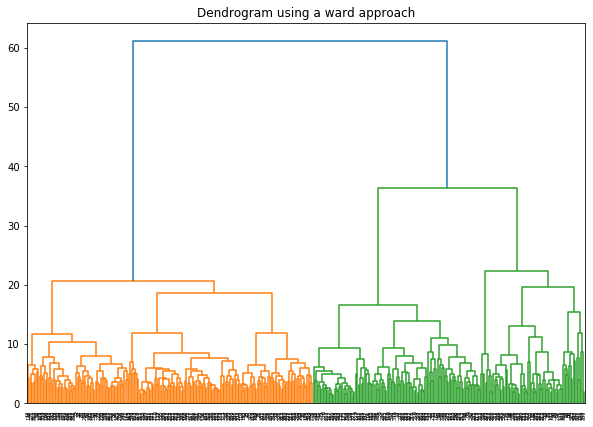

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram using a ward approach")  
dend = sch.dendrogram(sch.linkage(sign_df, method='ward'))

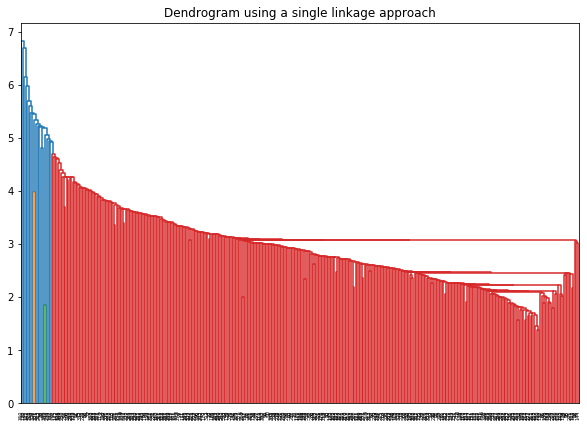

In [16]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram using a single linkage approach")  
dend = sch.dendrogram(sch.linkage(sign_df, method='single'))

_b. Which approach would you recommend based on the dendrograms? Why? (1 point)_

Based on the dendrograms, I would use the ward approach because the single linkage approach gives a poor representation. In the ward approach we see regular cluster sizes and in the other one we can't see anything at all.

_c. Familiarize yourself with Cophenetic correlation coefficient and calculate the cophenetic correlation distance for both single linkage as well as ward. (1 point)_

The Cophenetic correlation is a measure that helps us see if a dendrogram is well-performed. If it has faithfully preserved the pairwise distances between the original unmodeled data points.

The cophenetic correlation coefficient is the output value, that should be close to 1 for a high-quality solution. 



This measure can be used to compare alternative cluster solutions obtained using different algorithms.

In [17]:
import fastcluster as fc

# We perform the clustering with the ward approach
Z1 = fc.linkage_vector(sign_df, method='ward')

# Matrix of original distances between observations
orign_dists1 = fc.pdist(sign_df) 

# Matrix of cophenetic distances between observations
cophe_dists1 = sch.cophenet(Z1)  

# We calculate the cophenetic correlation
coef1 = np.corrcoef(orign_dists1, cophe_dists1)[0,1]
print(coef1)

0.4193214647903547


In [18]:
# We perform the clustering with the single linkage approach
Z2 = fc.linkage_vector(sign_df, method='single') 

# Matrix of original distances between observations
orign_dists2 = fc.pdist(sign_df)

# Matrix of cophenetic distances between observations
cophe_dists2 = sch.cophenet(Z2)  

# We calculate the cophenetic correlation
coef2 = np.corrcoef(orign_dists2, cophe_dists2)[0,1]
print(coef2)

0.5277066108136129


_d. Based on the cophenetic correlation distance, which approach performed better? (1 point)_

A higher cophenetic correlation distance shows a better performance, so we would say that the single linkage approach did better.

-----------------------------------------

ex2)

-----------------------------------------

1))

a))

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [20]:
df = pd.read_csv('golub.csv')
df = df.T
print(df.shape)
#print(df.head())

X = df.iloc[1:, :]
print(X.shape)

(39, 3051)
(38, 3051)


In [21]:
df2 = pd.read_csv('golub.cl.csv')
df2 = df2.iloc[:, 1:]
y = df2['x']
print(y.shape)
#print(y.head())

(38,)


In [22]:
pca = PCA()
pca.fit(X)
print(pca.explained_variance_ratio_)

[1.64508332e-01 9.93395254e-02 8.48538374e-02 5.99025604e-02
 4.47134465e-02 4.21526104e-02 3.81387974e-02 3.26371148e-02
 3.22153264e-02 2.55224915e-02 2.41717740e-02 2.31074491e-02
 2.14101903e-02 1.95057938e-02 1.85807222e-02 1.81370155e-02
 1.75287119e-02 1.63209496e-02 1.52152724e-02 1.49615780e-02
 1.42823598e-02 1.36772944e-02 1.31202379e-02 1.27704249e-02
 1.23284366e-02 1.18701622e-02 1.17053164e-02 1.13902084e-02
 1.09161389e-02 1.08078614e-02 1.02521583e-02 1.02101539e-02
 9.90734392e-03 9.26351668e-03 8.73931056e-03 8.39264905e-03
 7.44292813e-03 4.50486775e-32]


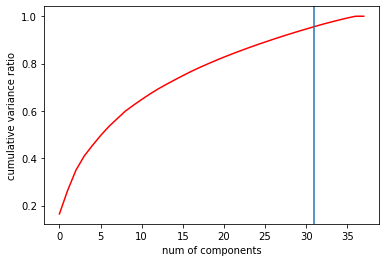

In [23]:
cum_sum = np.cumsum(pca.explained_variance_ratio_)

plt.plot(cum_sum, color='red')
plt.axvline(x=np.where(cum_sum>=0.95)[0][0])
plt.xlabel('num of components')
plt.ylabel('cumulative variance ratio');

more than 95% confidence of variances can be seen in the above plot

b))

scatterplot of 2 PC:

         PC1        PC2  x
0  -8.616498   0.192004  0
1   2.667179   3.806426  0
2  -5.795222  22.559449  0
3  -8.355211   1.560147  0
4 -13.767889 -10.683375  0 



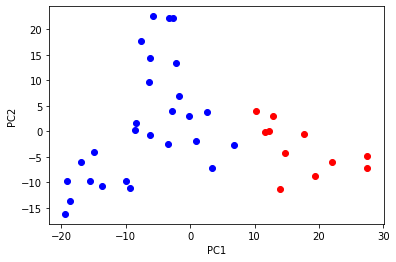

In [24]:
pca = PCA()
pca_2 = pca.fit_transform(X)

pca_2 = pd.DataFrame(data=pca_2[:, :2], columns=['PC1', 'PC2'])
pca_2 = pd.concat([pca_2, y], axis=1)
print(pca_2.head(), '\n')

plt.scatter(pca_2.iloc[:, 0][y==0], pca_2.iloc[:, 1][y==0], color='blue')
plt.scatter(pca_2.iloc[:, 0][y==1], pca_2.iloc[:, 1][y==1], color='red')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

c))

different types of dimensionality reduction techniques:
1. PCA
2. LDA
3. MDS
4. Isomap
5. t-SNE
6. UMAP
7. Spectral Embedding
8. Kernel PCA
9. FastICA
10. Factor Analysis
11. Gaussian Mixture Models
12. Random Projection
13. Autoencoder
14. Denoising Autoencoder
15. Stacked Autoencoder
16. Convolutional Autoencoder
17. Recurrent Neural Network
18. Convolutional Neural Network
19. Recurrent Neural Network
20. Multi-Layer Perceptron
21. Deep Neural Network


/home/cuneyt/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/cuneyt/.local/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 37 nearest neighbors...
[t-SNE] Indexed 38 samples in 0.000s...
[t-SNE] Computed neighbors for 38 samples in 0.005s...
[t-SNE] Computed conditional probabilities for sample 38 / 38
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 47.876270
[t-SNE] KL divergence after 300 iterations: 0.590161


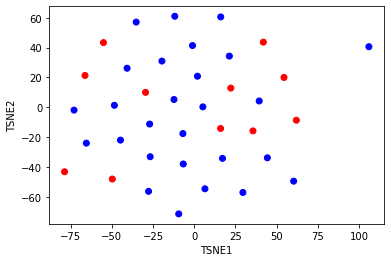

In [25]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

plt.scatter(tsne_results[:, 0], tsne_results[:, 1], color=['blue' if y==0 else 'red' for y in y])
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()

TSNE can compute a low-dimensional representation of the data by computing nearest neighbors and minimizing the distance between the data points in the original high-dimensional space

d))

1- PCA can distinguish different data points, therefore it is useful for plot

2- n=2 is not a good choice because it only covers cumulative ration around 0.3 which is very low, to get better results, it should be higher

2))

a)

correlation:

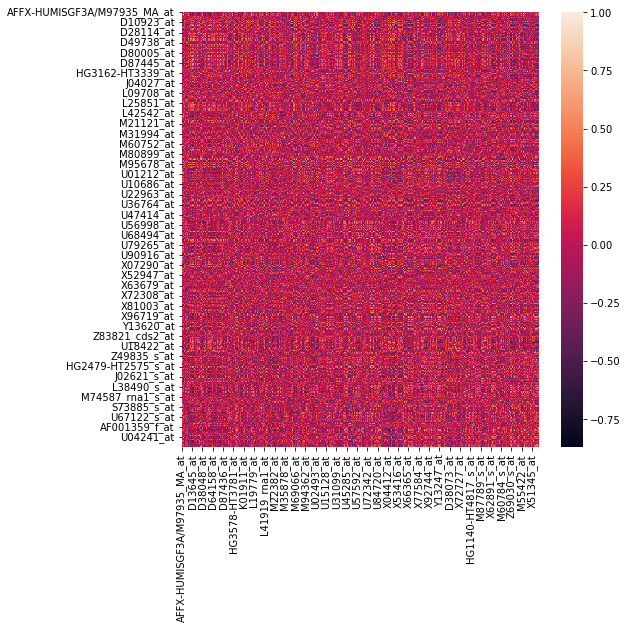

In [26]:
import seaborn as sn

corr_df = pd.DataFrame(data=df.iloc[1:, :].values, columns=df.iloc[0, :].values, dtype=float)
plt.figure(figsize=(8, 8))
sn.heatmap(corr_df.corr(), annot=False)

correlation heatmap for whole dataset by their column names

decorrelation: 

In [27]:
cor_matrix = corr_df.corr().abs()

upper_triangle = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))

to_drop = [col for col in upper_triangle.columns if any(upper_triangle[col] > 0.95)]
print(to_drop, '\n')

corr_df = corr_df.drop(corr_df[to_drop], axis=1)
print(corr_df.shape)
#print(corr_df.head())

['AFFX-HUMGAPDH/M33197_M_at', 'AFFX-HSAC07/X00351_M_at', 'M24899_at', 'U48959_at', 'U76421_at', 'X06256_at', 'X51757_at', 'X53961_at', 'X65977_at', 'X96584_at', 'X99076_rna1_at', 'Z19002_at', 'Z81326_at', 'X16323_at', 'L15326_s_at', 'D28235_s_at', 'X03689_s_at', 'M27394_s_at', 'S77893_s_at', 'X62891_s_at', 'M13560_s_at', 'Y00081_s_at', 'Y00787_s_at', 'M26311_s_at', 'Z49148_s_at', 'X12530_s_at', 'Z46632_r_at', 'M19045_f_at', 'X14008_rna1_f_at', 'U01317_cds4_at', 'HG2917-HT3061_f_at', 'X00351_f_at', 'X01677_f_at'] 

(38, 3018)


we create upper triangle of the matrix to reduce data, then discard higher confidence values from the dataset to create decorrelated dataset

b)

escape curse of dimensionality, overfitting etc.

reduce dimensionality 

reduce complexity of runtime/memory

-----------------------------------------

ex3)

-----------------------------------------

1))

reduced dataset of 5 PC: 

In [28]:
pca = PCA()
pca_5 = pca.fit_transform(X)

pca_5 = pd.DataFrame(data=pca_5[:, :5], columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
print(pca_5.head())

         PC1        PC2        PC3       PC4       PC5
0  -8.616498   0.192004  11.633593 -5.013673 -5.698934
1   2.667179   3.806426 -12.900046  1.582057 -7.879936
2  -5.795222  22.559449  -0.920152  2.076367  0.392584
3  -8.355211   1.560147   9.736203 -9.264945  5.709325
4 -13.767889 -10.683375 -10.260768 -9.375435  2.163919


logistic regression for 5 PC dataset:

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(pca_5, y, test_size=0.2)
print('X_train:\n', X_train.shape, '\nX_test:\n ', X_test.shape, '\ny_train:\n ',y_train.shape, '\ny_test:\n ', y_test.shape, '\n')
#print(X_train.head())
#print(X_test.head())
#print(y_train.head())
#print(y_test.head())

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

pred_X_test = logistic_regression.predict(X_test)
print('pred_X_test: ', pred_X_test, '\ny_test: ', y_test.values)

accuracy_score = accuracy_score(y_test,pred_X_test)
print('accuracy: ', accuracy_score)

X_train:
 (30, 5) 
X_test:
  (8, 5) 
y_train:
  (30,) 
y_test:
  (8,) 

pred_X_test:  [0 0 0 0 0 1 1 0] 
y_test:  [0 0 0 0 0 1 1 0]
accuracy:  1.0


accuracy can change for different train/test split, to get better accuracy, we should use more data as train/test split

2))

calibration curve for logistic regression:

In [30]:
from sklearn.linear_model import LogisticRegressionCV

print(X_train.shape)
print(np.bincount(y_train), '\n')

lr = LogisticRegressionCV().fit(X_train, y_train)
print(lr.predict_proba(X_test), '\n')
print(y_test)

(30, 5)
[21  9] 

[[0.8768411  0.1231589 ]
 [0.98554782 0.01445218]
 [0.9866957  0.0133043 ]
 [0.96506276 0.03493724]
 [0.64429268 0.35570732]
 [0.23090289 0.76909711]
 [0.07465671 0.92534329]
 [0.83635827 0.16364173]] 

26    0
14    0
19    0
8     0
11    0
33    1
29    1
21    0
Name: x, dtype: int64


In [31]:
from sklearn.calibration import calibration_curve

prob_true, prob_pred = calibration_curve(y_test, lr.predict_proba(X_test)[:, 1], n_bins=5)
print(prob_true)
print(prob_pred)

[0. 0. 1. 1.]
[0.06989887 0.35570732 0.76909711 0.92534329]


we need to fit calibration curve as it follows

In [32]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.calibration import calibration_curve

X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, stratify=y_train, random_state=0)
rf = RandomForestClassifier().fit(X_train_sub, y_train_sub)
scores = rf.predict_proba(X_test)[:, 1]

calibration_curve(y_test, scores, n_bins=20)

(array([0., 0., 0., 0., 0., 1., 1.]),
 array([0.  , 0.07, 0.13, 0.17, 0.5 , 0.67, 0.77]))

brier score loss:

In [33]:
from sklearn.metrics import brier_score_loss
b_score = brier_score_loss(y_test, pred_X_test)
print('brier score: ', b_score)

brier score:  0.0


lower value means better score for the model

3))

To check quality of the logistic model, we can use likelihood ratio test. We have full model as X contains all variables and nested reduced model contains only 5 components from dataset. Then we can compare both with likelihood ratio test whether we can accept or reject null hypothesis

In [34]:
from scipy.stats.distributions import chi2
import statsmodels.api as sm

def likelihood_ratio(ll_min, ll_max):
    return(-2*(ll_min-ll_max))
    

x1 = sm.add_constant(X.to_numpy(dtype=float))
full_model = sm.OLS(y.to_numpy(), x1).fit()

full_ll = full_model.llf
print('full_ll: ', full_ll, '\n')

x2 = sm.add_constant(pca_5.to_numpy(dtype=float))
reduced_model = sm.OLS(y, x2).fit()

reduced_ll = reduced_model.llf
print('reduced_ll: ', reduced_ll, '\n')


LR = likelihood_ratio(reduced_ll,full_ll)
print('chi square LR: ', LR, '\n')

p = chi2.sf(LR, 1)
print('p value is: ', p, '\n')

full_ll:  1171.2921958994766 

reduced_ll:  12.017154575320951 

chi square LR:  2318.550082648311 

p value is:  0.0 



p < 0.05, so we accept the null hypothesis, therefore the data is normally distributed. Full model is better than reduced model because it has more information.

-----------------------------------------